In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import json
import os
from tqdm import tqdm

In [2]:
DATASET_PATH = "/home/jack/datasets/polish_rap/"

In [3]:
def get_strong_words():
    with open(DATASET_PATH + "strong_language.json", "r") as f:
        return json.load(f)

In [7]:
strongs = get_strong_words()

In [5]:
len(strongs)

624

In [18]:
def get_all_rapers_strongs():
    rappers_strongs = {}
    rappers = os.listdir(DATASET_PATH + "ok_lyrics/")
    for rapper in rappers:
        songs = os.listdir(DATASET_PATH + "ok_lyrics/" + rapper)
        num_songs = len(songs)
        num_strongs = 0
        for song in songs:
            with open(DATASET_PATH + "ok_lyrics/" + rapper + "/" + song, "r") as f:
                song_text = json.load(f)
            song_words = song_text["lyrics"].split()
            strongs_in_song = len(set(strongs) & set(song_words))
            num_strongs += strongs_in_song
        rappers_strongs[rapper] = num_strongs/num_songs
    return rappers_strongs

In [19]:
all_rapers_strongs = get_all_rapers_strongs()

In [20]:
strongs_df = pd.DataFrame.from_dict(all_rapers_strongs, "index")

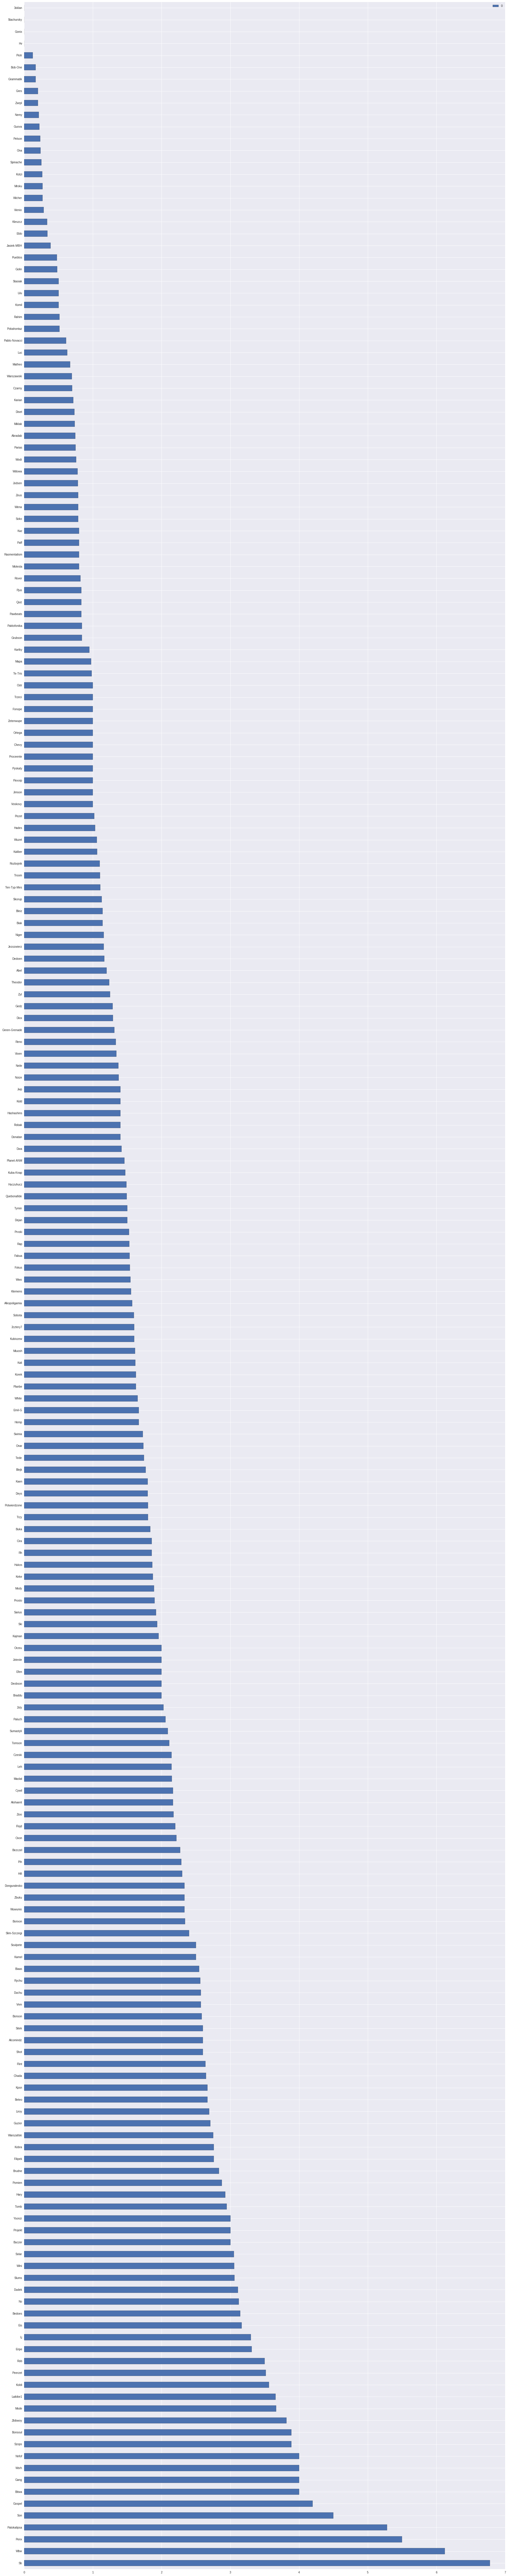

In [29]:
strongs_df.sort_values(by=0, inplace=True, ascending=False)
strongs_df.plot(kind="barh", figsize=(30, 160))